In [0]:
#@title LOADING OF THE DATA


In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
# The project was made on google colab
auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [8]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

  

title: CAPSTONE_PROJECT_REPORT													, id: 1Ou2Wivec5g14fxbM2mLDmo-XmXwvq7d8TONmsnG3eUU
title: Untitled document, id: 1t_DcPlIczfg95-a_VHjQoXrMt7BRZzSSSlGtYK0l6xs
title: yelp_review_1.csv, id: 1Pb-HyMgtDS7YLKy4fvHTmijQ8e5btxhf
title: assignment2_final.ipynb, id: 1bUcuXQXc7yxQJp3syyV1SKQrXhkyh5Pd
title: assignment2_final.ipynb, id: 1BzTVuxNs89te-CweYhAmmvAsoyJUVKyy
title: assignment2.ipynb, id: 1GgWimMgPEgfs5yK0wPE9ldZTOaDQIx7T
title: assignment2, id: 1GQ42YnoJY06wW6Boe6Md7hmX2mGcsCTv
title: TwitterAPIadnauseam.ipynb, id: 17CEE7esgukbxdksSofGcn0xtZLiCQL9z
title: Colab Notebooks, id: 1ifvtXVHfqG_RStAHTvCKFxq_EIVndFdI
title: Untitled0.ipynb, id: 1eao2LiZo6_CjDu8Fc7NRN4uXuFEX-tQK
title: Pics, id: 0B4Z5tSBhDSLqWnNGc2pCU3loakE
title: DSC_3425.JPG, id: 0B4Z5tSBhDSLqcTA2MWpkMVR4Zjg
title: mobile pics, id: 0B4Z5tSBhDSLqNmdYeWhUNGVmS3c
title: DSC_1395.jpg, id: 0B4Z5tSBhDSLqUHZ2cHRzdXZ2NE0
title: DSC_1393.jpg, id: 0B4Z5tSBhDSLqWnI3WXY2bTJiU3c
title: DSC_1392.jpg, id: 0B4Z5tSBhDSLqbkVzOExfQT

In [9]:
file2 = drive.CreateFile({'id': "1Pb-HyMgtDS7YLKy4fvHTmijQ8e5btxhf"})
print('title: %s, mimeType: %s' % (file2['title'], file2['mimeType']))

title: yelp_review_1.csv, mimeType: text/csv


In [0]:
file2.GetContentFile('yelp_review.csv') 

In [0]:
# Step 0: Receiving and reading the file.
import pandas as pd
xyz = pd.read_csv('yelp_review.csv', nrows=200000)
# due to huge data of 5.2 million reviews, I have selected 200 thousands reviews. 

In [13]:
# The data has a total of 200000 rows and 9 columns
xyz.head()
xyz.shape



(200000, 9)

In [14]:
# taking relevant columns from the reviews, which is text related to reviews and corresponding rating in stars.
review = xyz[['text', 'stars']]
review.head()

,text,stars
0,Super simple place but amazing nonetheless. It...,5
1,Small unassuming place that changes their menu...,5
2,Lester's is located in a beautiful neighborhoo...,5
3,Love coming here. Yes the place always needs t...,4
4,Had their chocolate almond croissant and it wa...,4


In [15]:
# will help to check how many reviews are there per rating.
review.stars.value_counts()

5    86501
4    46788
1    27375
3    22779
2    16557
Name: stars, dtype: int64

In [0]:
# The distributin of the rating shows that the classes or output are highly imbalanced, with more number of reviews towards 
#higher ratings. The pie plot below gives the details.

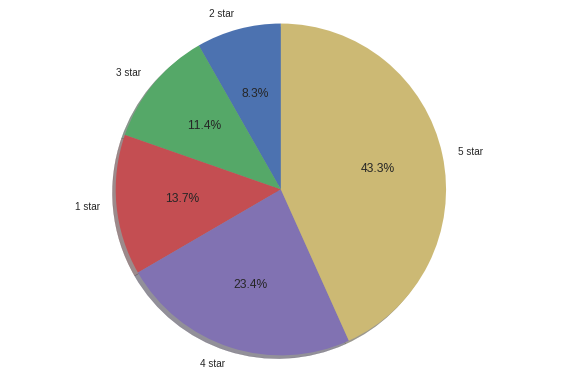

In [16]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['2 star', '3 star', '1 star', '4 star', "5 star"]
sizes = [16557, 22779, 27375, 46788, 86501] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [0]:
X = review["text"]
y = review.stars
X.shape
y.shape

(200000,)

In [0]:
#@title PREPROCESSING AND FEATURES EXTRACTION


In [0]:
#STEP 1/2: PREPROCESSING AND FEATURES EXTRACTION.
#STEMMING OF DOC USING NLTK
# Stemming is done so as to remove words which are of different tenses or with derivational affixes and hence it help to receive
# root words. Liked playing/played are two different words with common stem play.
# TfIdf vectorizer was used so that higher weightage is given to rare words and common words will be given less weightage.
# Snowball stemmer was used for stemming and TFIDF vectorizer (combination of count vectorizer and TFIDF transformer
# were used)

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])
      # this code resulted in a function, StemmedTfidfVectorizer which will help to convert the text in features,
      # which will combine the features of count vectorizer and TFIDF.


In [0]:

# WILL USE TF-IDF VECTORIZER, WHICH IS COMBINATION OF COUNT VECTORIZER AND TF IDF TRANSFORMER
# preprocessing and feature extraction, with english used for stop words.
# The data was devided into training and testing data in the ratio 75:25.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

#UNIGRAM
vectorizer_1 = StemmedTfidfVectorizer(stop_words='english')

In [0]:
X_train_dtm = vectorizer_1.fit_transform(X_train)
#dtm is data term matrix
#do fitting and transfrom in single step


In [0]:
tokens = vectorizer_1.get_feature_names()
print(len(tokens))
# number of features in unigram

81363


In [0]:
X_test_dtm = vectorizer_1.transform(X_test)
# This will convert the test data into features, without fitting.

In [0]:
# REPEATING WITH BIGRAM METHOD
# Bigram will make pair of words, like "very good", "very bad" instead of treating a single word as a feature. This will help
# to increase the accuracy. Example: "I love food from dosa grill", its unigram would be "I", "love", "food" , "from", "dosa"
#"grill", while boigram will be: "I love" "love food", "food from", "from dosa", "dosa grill". So this one will have combination
#of both single words and paired words
vectorizer_2 =  StemmedTfidfVectorizer(stop_words="english", ngram_range=(1,2))
X_train_dtm_2 = vectorizer_2.fit_transform(X_train)


In [0]:
tokens_2 = vectorizer_2.get_feature_names()
print(len(tokens_2))
#number of features in bigram

2849324


In [0]:

X_test_dtm_2 = vectorizer_2.transform(X_test)

In [0]:
print(tokens_2[200000:200059])

['bag 25', 'bag 30', 'bag 3rd', 'bag 48hr', 'bag 50', 'bag 60', 'bag 600', 'bag 75', 'bag 99', 'bag abercrombi', 'bag absurd', 'bag accessori', 'bag accus', 'bag actu', 'bag ad', 'bag adjust', 'bag adv', 'bag afterward', 'bag ag', 'bag aliant', 'bag alleg', 'bag allegi', 'bag almond', 'bag amaz', 'bag amen', 'bag anxi', 'bag apolog', 'bag appear', 'bag appet', 'bag appl', 'bag approach', 'bag area', 'bag arriv', 'bag ask', 'bag ass', 'bag assassin', 'bag assort', 'bag athletet', 'bag attach', 'bag attempt', 'bag authent', 'bag avail', 'bag avocado', 'bag aw', 'bag away', 'bag awesom', 'bag babi', 'bag bad', 'bag bag', 'bag bagel', 'bag bak', 'bag balaclava', 'bag bar', 'bag barbequ', 'bag bargain', 'bag bas', 'bag bean', 'bag beef', 'bag beer']


In [0]:
#@title SUPERVISED LEARNING/ EVALUATION


In [0]:
#STEP 3: SUPERVISED LEARNING/ EVALUATION
# MULTINOMIAL NAIVE BAYES
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
nb1 = MultinomialNB()

nb1.fit(X_train_dtm, y_train)
#fitting for naives on unigram



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
nb2 = MultinomialNB()
nb2.fit(X_train_dtm_2, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred_nb1 = nb1.predict(X_test_dtm)
# predicting for unigram


In [0]:
y_pred_nb2 = nb2.predict(X_test_dtm_2)
# Predicting for bigram

In [0]:
#F1 score for unigram NB
f1_score(y_test, y_pred_nb1, average= 'weighted')


0.43847600823977745

In [0]:

F1_nb = round(f1_score(y_test, y_pred_nb1, average= 'weighted'),5)
print(F1_nb)

In [0]:
# F1 score for bigram NB
# to ignore warning due to classes with no predictions made
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_nb2, average= 'weighted')


0.28645948412433225

In [0]:
F2_nb = round(f1_score(y_test, y_pred_nb2, average= 'weighted'),5)
print(F2_nb)

0.28646


In [0]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(class_weight='balanced')
lr1.fit(X_train_dtm, y_train)
#class weight balanced was used so that it can give proper results for unbalanced class outputs.



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
#predicting for unigram
y_pred_lr1 = lr1.predict(X_test_dtm)

In [0]:
lr2 = LogisticRegression(class_weight='balanced')
lr2.fit(X_train_dtm_2, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred_lr2 = lr2.predict(X_test_dtm_2)

In [0]:
# F1 score for unigram LR
f1_score(y_test, y_pred_lr1, average= 'weighted')

0.6380637428163922

In [0]:
F1_lr = round(f1_score(y_test, y_pred_lr1, average= 'weighted'),5)
print(F1_lr)

0.63806


In [0]:
# F1 score for bigram LR
f1_score(y_test, y_pred_lr2, average= 'weighted')

0.6486225428994348

In [0]:
F2_lr = round(f1_score(y_test, y_pred_lr2, average= 'weighted'),5)
print(F2_lr)

0.64862


In [0]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

param_grid = {'max_depth': [10, 20, 40, 50],
 'min_samples_leaf': [5,10,15],
 'min_samples_split': [5,10,15]}
clf = DecisionTreeClassifier(class_weight="balanced")


In [0]:
grid_obj1 = GridSearchCV(clf, param_grid, scoring="f1_weighted", verbose=10)

In [0]:
grid_fit1 = grid_obj1.fit(X_train_dtm, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, score=0.413793 -  16.3s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, score=0.412216 -  17.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, score=0.409210 -  17.3s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   50.7s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, score=0.413800 -  16.6s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, score=0.412272 -  17.2s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, score=0.409650 -  17.3s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15 ..........


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.7min remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, score=0.413718 -  16.5s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15 ..........


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.0min remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, score=0.412256 -  16.6s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15 ..........


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, score=0.409179 -  16.8s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5 ..........


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, score=0.413711 -  15.9s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5 ..........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, score=0.411855 -  16.4s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5 ..........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, score=0.408795 -  16.5s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, score=0.413711 -  16.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, score=0.411893 -  16.6s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, score=0.408795 -  16.5s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=15 .........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_sp

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=15, score=0.437276 -  49.1s
[CV] max_depth=20, min_samples_leaf=15, min_samples_split=5 ..........
[CV]  max_depth=20, min_samples_leaf=15, min_samples_split=5, score=0.441770 -  44.1s
[CV] max_depth=20, min_samples_leaf=15, min_samples_split=5 ..........
[CV]  max_depth=20, min_samples_leaf=15, min_samples_split=5, score=0.450091 -  43.7s
[CV] max_depth=20, min_samples_leaf=15, min_samples_split=5 ..........
[CV]  max_depth=20, min_samples_leaf=15, min_samples_split=5, score=0.433383 -  44.8s
[CV] max_depth=20, min_samples_leaf=15, min_samples_split=10 .........
[CV]  max_depth=20, min_samples_leaf=15, min_samples_split=10, score=0.441681 -  43.6s
[CV] max_depth=20, min_samples_leaf=15, min_samples_split=10 .........
[CV]  max_depth=20, min_samples_leaf=15, min_samples_split=10, score=0.450065 -  43.8s
[CV] max_depth=20, min_samples_leaf=15, min_samples_split=10 .........
[CV]  max_depth=20, min_samples_leaf=15, min_samples_sp

[CV]  max_depth=40, min_samples_leaf=15, min_samples_split=15, score=0.454340 - 1.4min
[CV] max_depth=40, min_samples_leaf=15, min_samples_split=15 .........
[CV]  max_depth=40, min_samples_leaf=15, min_samples_split=15, score=0.443202 - 1.4min
[CV] max_depth=50, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=50, min_samples_leaf=5, min_samples_split=5, score=0.445859 - 2.3min
[CV] max_depth=50, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=50, min_samples_leaf=5, min_samples_split=5, score=0.446398 - 2.3min
[CV] max_depth=50, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=50, min_samples_leaf=5, min_samples_split=5, score=0.446435 - 2.3min
[CV] max_depth=50, min_samples_leaf=5, min_samples_split=10 ..........
[CV]  max_depth=50, min_samples_leaf=5, min_samples_split=10, score=0.446493 - 2.3min
[CV] max_depth=50, min_samples_leaf=5, min_samples_split=10 ..........
[CV]  max_depth=50, min_samples_leaf=5, min_samples_split=1

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 124.9min finished


In [0]:
grid_best_1 = grid_fit1.best_params_
# This will help to know about the best parameters which were finalised after grid search (unigram)

In [0]:
print(grid_best_1)

{'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [0]:
grid_best_obj = grid_fit1.best_estimator_
# model classifier with best estimated parameters for unigram

In [0]:
y_pred_dt1 = grid_best_obj.predict(X_test_dtm)

In [0]:
# F1 score for unigram DT
f1_score(y_test, y_pred_dt1, average= 'weighted')

0.45931859552596127

In [0]:
F1_dt = round(f1_score(y_test, y_pred_dt1, average= 'weighted'),5)
print(F1_dt)

0.45932


In [0]:
# From the best parammeters, new clf was made for training and predicting for bigram

In [0]:
clf = DecisionTreeClassifier(max_depth=40, min_samples_leaf=5, min_samples_split=5,class_weight="balanced")

In [0]:
clf_2 = clf.fit(X_train_dtm_2, y_train)

In [0]:
y_pred_dt2 = clf_2.predict(X_test_dtm_2)

In [0]:
# F1 score for bigram DT
f1_score(y_test, y_pred_dt2, average= 'weighted')

0.4582643186981527

In [0]:
F2_dt = round(f1_score(y_test, y_pred_dt2, average= 'weighted'),5)
print(F2_dt)

0.45826


In [0]:

# RANDOM FOREST CLASSIFICATION
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [40, 60],
 'n_estimators': [200, 400]}
clf = RandomForestClassifier(class_weight="balanced")

grid_obj1 = GridSearchCV(clf, param_grid, scoring="f1_weighted", verbose=10)

In [0]:
grid_fit1 = grid_obj1.fit(X_train_dtm, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=40, n_estimators=200 ..................................
[CV] ......... max_depth=40, n_estimators=200, score=0.568643 - 4.9min
[CV] max_depth=40, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min remaining:    0.0s


[CV] ......... max_depth=40, n_estimators=200, score=0.569478 - 4.9min
[CV] max_depth=40, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.8min remaining:    0.0s


[CV] ......... max_depth=40, n_estimators=200, score=0.563553 - 4.8min
[CV] max_depth=40, n_estimators=400 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.6min remaining:    0.0s


[CV] ......... max_depth=40, n_estimators=400, score=0.569203 - 9.6min
[CV] max_depth=40, n_estimators=400 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 24.1min remaining:    0.0s


[CV] ......... max_depth=40, n_estimators=400, score=0.572102 - 9.6min
[CV] max_depth=40, n_estimators=400 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 33.7min remaining:    0.0s


[CV] ......... max_depth=40, n_estimators=400, score=0.565892 - 9.2min
[CV] max_depth=60, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 42.9min remaining:    0.0s


[CV] ......... max_depth=60, n_estimators=200, score=0.552246 - 9.0min
[CV] max_depth=60, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 51.8min remaining:    0.0s


[CV] ......... max_depth=60, n_estimators=200, score=0.553517 - 9.1min
[CV] max_depth=60, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 60.9min remaining:    0.0s


[CV] ......... max_depth=60, n_estimators=200, score=0.549079 - 8.7min
[CV] max_depth=60, n_estimators=400 ..................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 69.6min remaining:    0.0s


[CV] ......... max_depth=60, n_estimators=400, score=0.552278 -17.3min
[CV] max_depth=60, n_estimators=400 ..................................
[CV] ......... max_depth=60, n_estimators=400, score=0.553562 -19.4min
[CV] max_depth=60, n_estimators=400 ..................................
[CV] ......... max_depth=60, n_estimators=400, score=0.550792 -19.0min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 125.3min finished


In [0]:
grid_best_1 = grid_fit1.best_params_

In [0]:
print(grid_best_1)

{'max_depth': 40, 'n_estimators': 400}


In [0]:
grid_best_obj1 = grid_fit1.best_estimator_

In [0]:
y_pred_rf = grid_best_obj1.predict(X_test_dtm)
# predciting for unigram

In [0]:
# F1 score for unigram RF
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_rf, average= 'weighted')

0.5764521294369451

In [0]:
F1_rf = round(f1_score(y_test, y_pred_rf, average= 'weighted'),5)
print(F1_rf)

0.57645


In [0]:
clf = RandomForestClassifier(max_depth=40, n_estimators=400,class_weight="balanced")
#based on best parameters, new clf was made for bigram


In [0]:
grid_fit2 = clf.fit(X_train_dtm_2, y_train)

In [0]:
y_pred_rf2 = grid_fit2.predict(X_test_dtm_2)

In [0]:
# F1 score for bigram RF
f1_score(y_test, y_pred_rf2, average= 'weighted')

0.5598125418533823

In [0]:
F2_rf = round(f1_score(y_test, y_pred_rf2, average= 'weighted'),5)
print(F2_rf)

0.55981


In [0]:
# The data of 200,000 was huge for SVM, and its very tough (for my setup) to train and tune this huge data for SVM.
# hence for SVM, I used 25000 reviews, and the whole process was repeated starting from TFIDF vectorization
# to stemming for SVM.

In [0]:
# Step 0: Receiving and reading the file.
import pandas as pd
xyz = pd.read_csv('yelp_review.csv', nrows=25000)

In [0]:
# taking relevant columns from the reviews
review = xyz[['text', 'stars']]
review.head()

,text,stars
0,Super simple place but amazing nonetheless. It...,5
1,Small unassuming place that changes their menu...,5
2,Lester's is located in a beautiful neighborhoo...,5
3,Love coming here. Yes the place always needs t...,4
4,Had their chocolate almond croissant and it wa...,4


In [0]:
# The distributin of the rating shows that the classes or output are highly imbalanced, with more number of reviews towards 
#higher ratings. The pie plot below gives the details.

In [0]:

X = review["text"]
y = review.stars
X.shape
y.shape

(25000,)

In [0]:
#STEP 1/2: PREPROCESSING AND FEATURES EXTRACTION.
#STEMMING OF DOC USING NLTK

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])


In [0]:

# WILL USE TF-IDF VECTORIZER, WHICH IS COMBINATION OF COUNT VECTORIZER AND TF IDF TRANSFORMER
# preprocessing and feature extraction
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

#UNIGRAM
vectorizer_1 = StemmedTfidfVectorizer(stop_words='english')

In [0]:
X_train_dtm = vectorizer_1.fit_transform(X_train)
#dtm is data term matrix
#do fitting and transfrom in single step


In [0]:
tokens = vectorizer_1.get_feature_names()
print(len(tokens))
# number of features in unigram

29766


In [0]:
X_test_dtm = vectorizer_1.transform(X_test)

In [0]:
# REPEATING WITH BIGRAM METHOD
vectorizer_2 =  StemmedTfidfVectorizer(stop_words="english", ngram_range=(1,2))
X_train_dtm_2 = vectorizer_2.fit_transform(X_train)


In [0]:
tokens_2 = vectorizer_2.get_feature_names()
print(len(tokens_2))
#number of features in bigram

644047


In [0]:

X_test_dtm_2 = vectorizer_2.transform(X_test)

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [0]:
# SUPPORT VECTOR MACHINES
from sklearn import svm
from sklearn.grid_search import GridSearchCV

clf = svm.SVC(class_weight="balanced")
param_grid = {'C': [1,10,50], 
          'kernel': ['linear','rbf'],
         "gamma":[0.01, 0.1, 1]}


grid_obj1 = GridSearchCV(clf, param_grid, scoring="f1_weighted", verbose=10)

In [0]:
grid_fit1 = grid_obj1.fit(X_train_dtm, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.552679 - 1.7min
[CV] C=1, gamma=0.01, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.566551 - 1.7min
[CV] C=1, gamma=0.01, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.5min remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.553674 - 1.7min
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.8min remaining:    0.0s


[CV] ............ C=1, gamma=0.01, kernel=rbf, score=0.362423 - 2.6min
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ............ C=1, gamma=0.01, kernel=rbf, score=0.193262 - 2.6min
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.4min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 13.1min remaining:    0.0s


[CV] ............ C=1, gamma=0.01, kernel=rbf, score=0.387085 - 2.6min
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......... C=1, gamma=0.1, kernel=linear, score=0.552679 - 1.7min
[CV] C=1, gamma=0.1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 14.8min remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=linear, score=0.566551 - 1.7min
[CV] C=1, gamma=0.1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 16.5min remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=linear, score=0.553674 - 1.7min
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 18.2min remaining:    0.0s


[CV] ............. C=1, gamma=0.1, kernel=rbf, score=0.560019 - 2.2min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ............. C=1, gamma=0.1, kernel=rbf, score=0.558634 - 2.2min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ............. C=1, gamma=0.1, kernel=rbf, score=0.553254 - 2.2min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.552679 - 1.7min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.566551 - 1.7min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.553674 - 1.7min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.574149 - 2.3min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ............ C=50, gamma=0.1, kernel=rbf, score=0.534819 - 2.1min
[CV] C=50, gamma=0.1, kernel=rbf .....................................
[CV] ............ C=50, gamma=0.1, kernel=rbf, score=0.529624 - 2.1min
[CV] C=50, gamma=1, kernel=linear ....................................
[CV] ........... C=50, gamma=1, kernel=linear, score=0.507282 - 1.9min
[CV] C=50, gamma=1, kernel=linear ....................................
[CV] ........... C=50, gamma=1, kernel=linear, score=0.511630 - 1.9min
[CV] C=50, gamma=1, kernel=linear ....................................
[CV] ........... C=50, gamma=1, kernel=linear, score=0.506715 - 1.8min
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] .............. C=50, gamma=1, kernel=rbf, score=0.563914 - 2.9min
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] .............. C=50, gamma=1, kernel=rbf, score=0.561747 - 2.9min
[CV] C=50, gamma=1, kernel=rbf .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 111.3min finished


In [0]:
grid_fit1.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [0]:
grid_best_obj1 = grid_fit1.best_estimator_
# model classifier with best estimated parameters for unigram

In [0]:
y_pred_svm = grid_best_obj1.predict(X_test_dtm)

In [0]:
# F1 score for unigram SVM
f1_score(y_test, y_pred_svm, average= 'weighted')

0.5894538685240118

In [0]:
F1_svm = round(f1_score(y_test, y_pred_svm, average= 'weighted'),5)
print(F1_svm)

0.58945


In [0]:
grid_fit2 = svm.SVC(C=1, gamma=1, kernel="rbf", class_weight="balanced")

In [0]:
grid_best_obj2 = grid_fit2.fit(X_train_dtm_2, y_train)
#fitting for bigram

In [0]:
y_pred_svm2 = grid_best_obj2.predict(X_test_dtm_2)

In [0]:
# F1 score for bigram SVM
f1_score(y_test, y_pred_svm2, average= 'weighted')

0.5721454732355884

In [0]:
F2_svm = round(f1_score(y_test, y_pred_svm2, average= 'weighted'),5)
print(F2_svm)

0.57215


In [0]:
#@title EVALUATION OF THE SCORES


In [0]:
# Plotting all the score for comparison and evaluation
# Storing all the values of scores in respective variables, rounded to 5 place of decimal.
F1_nb = 0.43847
F2_nb = 0.28646
F1_lr = 0.63806
F2_lr = 0.64862
F1_dt = 0.45932
F2_dt = 0.45826
F1_rf = 0.57645
F2_rf = 0.55981
F1_svm = 0.58945
F2_svm = 0.57215

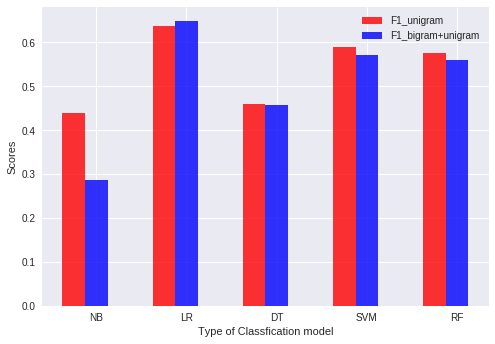

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 5
F1_Score_unigram = (F1_nb, F1_lr, F1_dt, F1_svm, F1_rf)
F1_Score_bigram = (F2_nb, F2_lr, F2_dt, F2_svm, F2_rf)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, F1_Score_unigram, bar_width,
                 alpha=opacity,
                 color='r',
                 label='F1_unigram')
 
rects2 = plt.bar(index + bar_width, F1_Score_bigram, bar_width,
                 alpha=opacity,
                 color='b',
                 label='F1_bigram+unigram')
 
plt.xlabel('Type of Classfication model')
plt.ylabel('Scores')
plt.title('')
plt.xticks(index + bar_width, ('NB', 'LR', 'DT', 'SVM', "RF"))
plt.legend()

In [0]:
#@title DISCUSSION AND COMPARISON WITH BENCHMARK




```
It can be seen that the highest score is for logistic regression (unigram+monogram), with the score of 0.64862, i.e 64.9%, this is followed by logistic regression only with 0.63806, 63.8%. Apart from logisitc regression, the models  which performed well were Support vector machine with unigram score of 58.9% followed by random forest with 0.57645/ 57.6% for unigram. 
```





```
The benchmark model selected was from Yelp Dataset Challenge: Review Rating Prediction, from Nabiha Asghar. The highest accuracy from this model was 56% with Linear SVC and for logistic regression, the scores were 54% (accuracy score). For my model, the highest score (F1) was 64.9% for logistic regression (unigram+bigram) and 58.9% for SVM, unigram.

Link for paper is as:
```



[https://arxiv.org/pdf/1605.05362.pdf](https://)

